# Neutrino Oscillation: Animations

Authors: Lodovico, Lewis<br>
Last Update: 06/02

# Introduction
In this notebook, the mathematics of the neutrino oscillation has been implemented, with the resulting functions being used to visually depict this phenomenon with vpython. This is initially applied to the two-flavour case and is eventually extended to three flavours. The oscillation is displayed with the neutrino moving through its 'mass eigenstate space' as a function of time, with the probability being represented by the colour of the sphere (red for electron, green for muon and blue for tau neutrino). 

In [27]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from vpython import sphere, cylinder, color, rate, vector, canvas, arrow
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import tkinter as tk
from IPython.display import Image # needed to import a remote image later

# Defining Constants

In [2]:
# mixing factors (converted from degrees to radians)
th12 = np.radians(33.82)
th23 = np.radians(48.3)
th13 = np.radians(8.61)
delta = np.radians(222)

# mass differences
dm21_sq = 7.53*10**(-5) # eV^2
dm32_sq = 2.52*10**(-3) # eV^2

# mass eigenstates
m1 = 0.75 # eV
m2 = np.sqrt(m1*m1 + dm21_sq) # eV
m3 = np.sqrt(m2*m2 + dm32_sq) # eV

#calculate third mass difference squared
dm31_sq = m3*m3 - m1*m1 # eV^2

# set energy values
E_sun_pp = 4*10**5 # eV 
# note: add energy values from other reactions, e.g. atmospheric, nuclear reactor

# important constants:
# speed of light
c = 299792.458 # km s^-1 
# Planck constant
hbar = 6.582119569*10**(-16) # eV*s
# Astronomical unit (i.e. the distance between the Sun and the Earth)
AU = 149597870.700 # km

# The Two Flavour Case

The following defines the orthogonal basis vectors for mass eigenstates $m_1$ and $m_2$, the 2D rotation matrix, $U$ and describes how this is used to trtansform the mass eigenvectors to the flavour eigenvectors. The time independent states are then plotted for an arbitrary theta. 

<IPython.core.display.Javascript object>


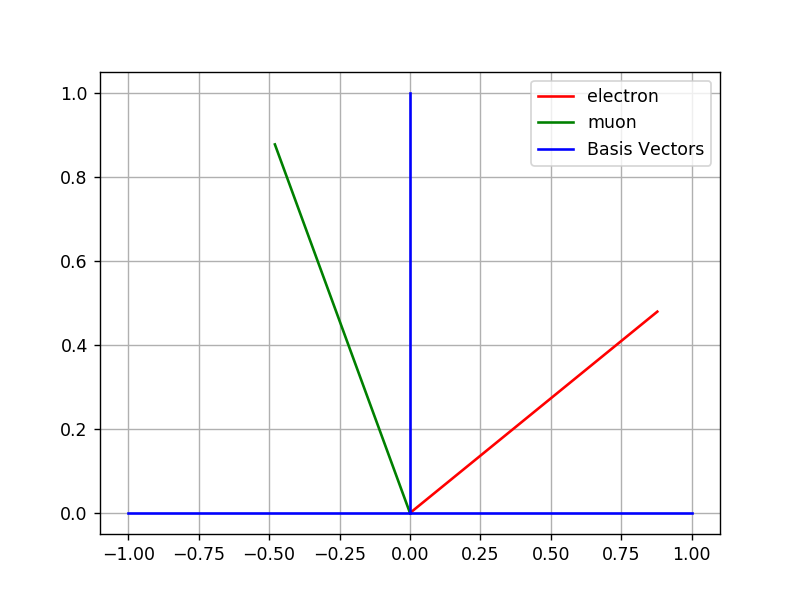

In [3]:
theta=0.5#Mixing Angle
v1=np.array([[1],[0]])#mass1 basis vector
v2=np.array([[0],[1]])#mass2 basis vector
U= np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])#Rotation Matrix
vv=np.array([[v1],[v2]])#Vector of basis vectors 

V = U.dot(vv)# Vector of each flavour in the mass basis

#Plotting flavours for t=0  
plt.figure()
plt.grid(True)

l1=([0,V[0,0]])
l2=([0,V[0,1]])
l3=([0,V[1,0]])
l4=([0,V[1,1]])
plt.plot(l1,l2,'r-',label='electron')
plt.plot(l3,l4,'g-',label='muon')
plt.plot([-1,1],[0,0],'b-',label='Basis Vectors')
plt.plot([0,0],[0,1],'b-')
plt.legend()


# Defining parameters for the Oscillation
The following creates an array of time points for the animation to be iterated over and a function has been written to generate the energies of the mass eigenstates. 

In [4]:
#Time Dependence
L = np.linspace(0,AU,1000)# A distance range for which the neutrino travels
t= L/c#The time taken for the neutrino to reach each point in the distance array
E1=2
E2=5
Ut= np.array([[np.cos(theta)*np.cos(E1*t[0]),np.sin(theta)*np.cos(E2*t[0])],[-np.sin(theta)*np.cos(E1*t[0]),np.cos(theta)*np.cos(E2*t[0])]])
Tr= Ut.dot(vv)

#P=((np.sin(2*theta))**2)*np.sin((E1-E2)*t/2)
print(t[0])

0.0


In [5]:
###Energy Function for each mass/hbar###
def energy(m1, m2, m3, E):
    """
    A function that defines the total energy of each neutrino flavour
    Input: Neutrino masses and initial energies
    Output: Total energies E1, E2, E3 for the electron, muon and tau neutrinos respectively in array format
    """
    
    #find the energy of the two mass eigenstates
    E1 = np.sqrt(E*E + m1*m1)
    E2 = np.sqrt(E*E + m2*m2)
    E3 = np.sqrt(E*E + m3*m3)
    
    Energy= np.array([E1,E2,E3])
    return Energy

In [10]:
Energies= energy(m1,m2,m3,E_sun_pp)
E1=Energies[0]
E2=Energies[1]
E3=Energies[2]

#In Lodovico's terms
# mass eigenstates vector
mar_3f = np.array([m1, m2, m3]) 

#rotational matrix
U1 = np.array([[1, 0, 0], [0, np.cos(th23), np.sin(th23)], [0, -np.sin(th23), np.cos(th23)]]) #first matrix
U2 = np.array([[np.cos(th13), 0, np.sin(th13)*np.exp(-1j*delta)], [0, 1, 0], 
               [-np.sin(th13)*np.exp(1j*delta), 0, np.cos(th13)]]) #second matrix
U3 = np.array([[np.cos(th12), np.sin(th12), 0], [np.sin(th12), np.cos(th12), 0], [0, 0, 1]]) #third matrix
rot_mat_3f = np.dot(U1, np.dot(U2, U3)) #final matrix
print(E3)

400000.00000070635


# Probability Function
Calculates probability of transition from an initial neutrino of flavour $\alpha$ to a neutrino of flavour $\beta$, where $\alpha, \beta = e, \mu, \tau$.

Simple:


In [11]:
def prob_transition(alpha, beta, E, L):
    """Calculates the probability of a transition between an initial neutrino alpha to a neutrino beta
    Takes as inputs the initial and final neutrino flavours alpha and beta, 
    the energy at which the neutrino is produced E (in eV),
    and the distance travelled by the particle L (in km)
    Returns the probability of the transition"""
    
    if (alpha == "electron" and beta == "muon") or (alpha == "muon" and beta == "electron"): 
        ar = np.array([th12, dm21_sq])
    elif (alpha == "electron" and beta == "tau") or (alpha == "tau" and beta == "electron"):
        ar = np.array([th13, dm31_sq])
    elif (alpha == "muon" and beta == "tau") or (alpha == "tau" and beta == "muon"):
        ar = np.array([th23, dm32_sq])
    else:
        return "Error"
        
    arg = 1.27*ar[1]*L/E
        
    P = np.sin(2*ar[0])*np.sin(2*ar[0])*np.sin(arg)*np.sin(arg)
    
    return P

All transitions:

In [12]:
def full_prob(L, E, alpha):
    """Calculates the probability of a neutrino of flavour alpha to remain of that same flavour or to change into another
    flavour
    Takes as inputs the distance L (in kilometers), the energy at which the neutrino is created E (in eV), 
    and the initial flavour alpha ("electron", "muon", or "tau")
    Returns an array with three elements respectively representing the probability of the neutrino being an electron, muon
    or tau neutrino"""
    
    # transform from string to integer
    if alpha == "electron":
        a = 0
    elif alpha == "muon":
        a = 1
    elif alpha == "tau":
        a = 2
    else:
        print('Error: choose from "electron", "muon" or "tau"')
        
    # calculate X_{ij} (argument of sine squared)
    X = np.zeros((3, 3)) #store
    for i in range(3):
        for j in range(3):
            X[i, j] = 1267000000*(mar_3f[i]*mar_3f[i] - mar_3f[j]*mar_3f[j]) * L / (4*E)
        
    # calculate probabilities
    U = rot_mat_3f 
    vals = np.zeros(3) #store
    for b in range(3): 
        sum_re_parts = 0
        sum_im_parts = 0
        for i in range(3):
                for j in range(i):
                    term = np.conj(U[a, i])*U[b, i]*U[a, j]*np.conj(U[b, j])
                    re_part = np.real(term)*np.sin(X[i,j])*np.sin(X[i,j])
                    im_part = np.imag(term)*np.sin(2*X[i,j])
                    sum_re_parts += re_part
                    sum_im_parts += im_part
                    #print(b, i, j, term, sum_re_parts, sum_im_parts)
        if b == a:
            vals[b] = 1 - 4*sum_re_parts + 2*sum_im_parts
        else:
            vals[b] = 4*sum_re_parts - 2*sum_im_parts
        #print("End", (a, b))
            
    return vals

#testp = full_prob(AU, E_sun_pp, "electron")*100
[full_prob(AU, E_sun_pp, i)*100 for i in ["electron", "muon", "tau"]]

[array([45.30785389,  3.88505057, 38.00339538]),
 array([ 10.94745561, -10.32635099, -61.05478709]),
 array([ 30.94099033, -60.90959482,  29.24135299])]

In [8]:
P=prob_transition("electron", "muon", E_sun_pp, L[6])
print(P)

3.946449238786773e-08


## Defining Functions for each animation

In [15]:
def electron(theta,E):
    """
    A function that executes the two flavour neutrino oscillation starting from ve
    Input: The mixing angle, theta, and the energy of the initial particle
    Output: An animation representing the neytrino oscillation, moving between mass states, with colour change representing 
            transition probabilities
    """
    scene= canvas(background=color.white)

    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    Energies= energy(m1,m2,m3,E)
    E1=Energies[0]
    E2=Energies[1]
    E3=Energies[2]
    Ut= np.array([[np.cos(theta)*np.cos(E1*t[0]),np.sin(theta)*np.cos(E2*t[0])],[-np.sin(theta)*np.cos(E1*t[0]),np.cos(theta)*np.cos(E2*t[0])]])
    Tr= Ut.dot(vv)##Time Dependent rotation

    # ...and the bob.
    e_neutrino = sphere(pos=vector(Tr[0,0],Tr[0,1],0), 
                      radius = 0.1, color=color.black, make_trail=True)

    N=100
    # Loop for electron neutrino 
    


    for i in range(0,N):
    
   
        ## first system:
        Ut= np.array([[np.cos(theta)*np.cos(E1*t[i]),np.sin(theta)*np.cos(E2*t[i])],[-np.sin(theta)*np.cos(E1*t[i]),np.cos(theta)*np.cos(E2*t[i])]])
        Tr= Ut.dot(vv)
    
        xpos=Tr[0,0]
        ypos=Tr[0,1]
    
        e_neutrino.pos= vector(xpos,ypos,0)
    
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
        P=prob_transition("electron", "muon", E, L[i])#Probability that an electron neutrino turns into a muon neutrino
        e_neutrino.color= vector(1-abs(P),abs(P),0)#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
    
   
        rate(5) # max number of screen updates per second
        #print(bob.color)

In [16]:
def muon(theta,E):
    """
    A function that executes the two flavour neutrino oscillation starting from vm
    Input: The mixing angle, theta, and the energy of the initial particle
    Output: An animation representing the neutrino oscillation, moving between mass states, with colour change representing 
            transition probabilities
    """
    scene= canvas(background=color.white)

    # first set up the objects:
    pivot1 = vector(-1,0,0) # pivot point at centre of display
    Energies= energy(m1,m2,m3,E)
    E1=Energies[0]
    E2=Energies[1]
    E3=Energies[2]
    Ut= np.array([[np.cos(theta)*np.cos(E1*t[0]),np.sin(theta)*np.cos(E2*t[0])],[-np.sin(theta)*np.cos(E1*t[0]),np.cos(theta)*np.cos(E2*t[0])]])
    Tr= Ut.dot(vv)
    
    # ...and the bob.
    m_neutrino = sphere(pos=vector(Tr[1,0],Tr[1,1],0), 
                      radius = 0.1, color=color.black, make_trail=True)

    N=100
    
    for i in range(0,N):
    
   
        ## first system:
        Ut= np.array([[np.cos(theta)*np.cos(E1*t[i]),np.sin(theta)*np.cos(E2*t[i])],[-np.sin(theta)*np.cos(E1*t[i]),np.cos(theta)*np.cos(E2*t[i])]])
        Tr= Ut.dot(vv)
    
        xpos=Tr[1,0]
        ypos=Tr[1,1]
    
        m_neutrino.pos= vector(xpos,ypos,0)
    
        #axes
        rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
        rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
        Pm=prob_transition("muon", "electron", E, L[i])#Probability that a muon neutrino turns into an electron neutrino
        m_neutrino.color= vector(abs(Pm),1-abs(Pm),0)#red= probability of  transforming. Redder= more likely to remain an electron neutrino.
    
   
        rate(5) # max number of screen updates per second
        #print(m_neutrino.color)

# Input Dependent Animation

In [18]:
theta= float(input("Input Mixing Angle"))
E= float(input("Input energy"))
f= (input("Input flavour:"))
if f in ['e','E','electron','Electron']:
    print("Initially electron neutrino" )
    electron(theta,E)
if f in ['m','M','Mu','MU','mu','Muon','muon'] :
    print("Initially muon neutrino" )
    muon(theta,E)
else:
        print('End')

Input Mixing Angle32
Input energy400000
Input flavour:e
Initially electron neutrino


<IPython.core.display.Javascript object>

End


# Three Flavour Case

## The Transformation matrix, U

In [18]:
###TRANSFORMATION MATRIX###


u_atm=np.array([[1,0,0],[0,np.cos(th23),np.sin(th23)],[0,-np.sin(th23),np.cos(th23)]])#Atmospheric Contribution
u_cross=np.array([[np.cos(th13),0,np.sin(th13)*np.exp(complex(0,delta))],[0,1,0],[-np.sin(th13)*np.exp(complex(0,delta)),0,np.cos(th13)]])#Cross mixing matrix
u_solar=np.array([[np.cos(th12),np.sin(th12),0],[-np.sin(th12),np.cos(th12),0],[0,0,1]])#Solar contribution

cs=u_cross.dot(u_solar)#cross x solar matrix multiplication

U_tot=u_atm.dot(cs)# Full transformation matrix



vt1=np.array([[1],[0],[0]])#mass1 basis vector
vt2=np.array([[0],[1],[0]])#mass2 basis vector
vt3=np.array([[0],[0],[1]])#mass3 basis vector

Vfull=np.array([[vt1],[vt2],[vt3]])#Vector of basis vectors 

v_3f= U_tot.dot(Vfull)#Transforming Mass Basis to Flavour Basis

v3r= v_3f.real# real part of flavour vectors
#print(v3r)

<IPython.core.display.Javascript object>


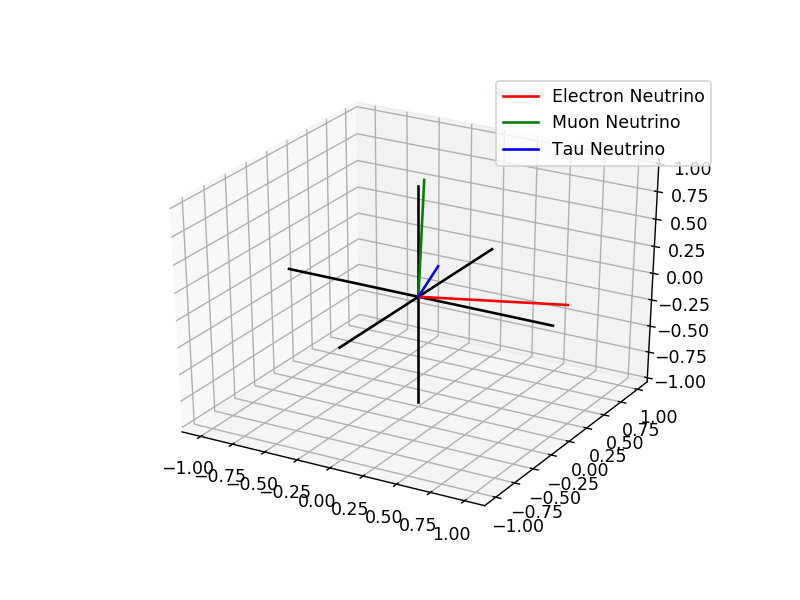

In [19]:
###PLOTTING BASES AND FLAVOUR VECTORS###

fig=plt.figure()
ax= fig.gca(projection='3d')
ax.plot(xs=[-1,1],ys=[0,0],zs=[0,0], color='k')
ax.plot(xs=[0,0],ys=[1,-1],zs=[0,0],color='k')
ax.plot(xs=[0,0],ys=[0,0],zs=[1,-1],color='k')

#Electron Neutrino coordinates
x1=([0,v3r[0,0,0,0]])
y1=([0,v3r[0,1,0,0]])
z1=([0,v3r[0,2,0,0]])

#Muon Neutrino Coordinates
x2=([0,v3r[1,0,0,0]])
y2=([0,v3r[1,1,0,0]])
z2=([0,v3r[1,2,0,0]])

#Tau Neutrino Coordinates
x3=([0,v3r[2,0,0,0]])
y3=([0,v3r[2,1,0,0]])
z3=([0,v3r[2,2,0,0]])

ax.plot(xs=x1,ys=y1,zs=z1,color='r',label='Electron Neutrino')
ax.plot(xs=x2,ys=y2,zs=z2,color='g',label='Muon Neutrino')
ax.plot(xs=x3,ys=y3,zs=z3,color='b',label='Tau Neutrino')
plt.legend()

In [20]:
###Time Dependence###
#E3=6
VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[0]))#mass1 basis vector
VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[0]))#mass2 basis vector
VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[0]))#mass3 basis vector

VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

VTF=U_tot.dot(VFULL)#Time Dependent Transformation
VTFR= VTF.real#Real parts of the flavour vectors



## Starting with an Electron neutrino

In [26]:
scene= canvas(background=color.white)

# first set up the objects:
pivot1 = vector(-1,0,0) # pivot point at centre of display


# ...and the bob.
e_neutrino2 = sphere(pos=vector(VTFR[0,0,0,0],VTFR[0,1,0,0],VTFR[0,2,0,0]), 
                      radius = 0.1, color=color.black, make_trail=True)
scene.camera.pos=vector(1.5,0.5,1.73205)
scene.camera.axis=-scene.camera.pos
N=1000
# Loop for electron neutrino 
for i in range(0,N):
    
    Energies= energy(m1,m2,m3,0)
    E1=Energies[0]
    E2=Energies[1]
    E3=Energies[2]
    ## first system:
    VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[i]))#mass1 basis vector
    VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[i]))#mass2 basis vector
    VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[i]))#mass3 basis vector

    VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

    VTF=U_tot.dot(VFULL)#Time Dependent Transformation
    VTFR= VTF.real
    
    xpos=VTFR[0,0,0,0]
    ypos=VTFR[0,1,0,0]
    zpos=VTFR[0,2,0,0]
    
    e_neutrino2.pos= vector(xpos,ypos,zpos)
    
    #axes
    rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(0,0,-1), axis = vector(0,0,2), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
    Ptrans= full_prob(L[i], E_sun_pp, "electron")
    e_neutrino2.color= vector(abs(Ptrans[0]),abs(Ptrans[1]),abs(Ptrans[2]))#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
    
   
    rate(5) # max number of screen updates per second
    #print(bob.color)


<IPython.core.display.Javascript object>

IndexError: index 300 is out of bounds for axis 0 with size 300

# Starting with a Muon Neutrino

In [24]:
scene= canvas(background=color.white)

# first set up the objects:
pivot1 = vector(-1,0,0) # pivot point at centre of display


# ...and the bob.
m_neutrino2 = sphere(pos=vector(VTFR[1,0,0,0],VTFR[1,1,0,0],VTFR[1,2,0,0]), 
                      radius = 0.1, color=color.black, make_trail=True)
scene.camera.pos=vector(1.5,0.5,1.73205)
scene.camera.axis=-scene.camera.pos
N=1000
# Loop for electron neutrino 
for i in range(0,N):
    
    Energies= energy(m1,m2,m3,E_sun_pp)
    E1=Energies[0]
    E2=Energies[1]
    E3=Energies[2]
    ## first system:
    VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[i]))#mass1 basis vector
    VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[i]))#mass2 basis vector
    VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[i]))#mass3 basis vector

    VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

    VTF=U_tot.dot(VFULL)#Time Dependent Transformation
    VTFR= VTF.real
    
    xpos=VTFR[1,0,0,0]
    ypos=VTFR[1,1,0,0]
    zpos=VTFR[1,2,0,0]
    
    m_neutrino2.pos= vector(xpos,ypos,zpos)
    
    #axes
    rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(0,0,-1), axis = vector(0,0,2), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
    Pme=prob_transition("muon", "electron", E_sun_pp, L[i])#Probability that an electron neutrino turns into a muon neutrino
    Pmt=prob_transition("muon", "tau", E_sun_pp, L[i])
    m_neutrino2.color= vector(abs(Pme),1-abs(Pme)-abs(Pmt),abs(Pmt))#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
    
   
    rate(5) # max number of screen updates per second
    #print(bob.color)

<IPython.core.display.Javascript object>

# Starting with a Tau Neutrino

In [25]:
scene= canvas(background=color.white)

# first set up the objects:
pivot1 = vector(-1,0,0) # pivot point at centre of display


# ...and the bob.
t_neutrino2 = sphere(pos=vector(VTFR[2,0,0,0],VTFR[2,1,0,0],VTFR[2,2,0,0]), 
                      radius = 0.1, color=color.black, make_trail=True)
scene.camera.pos=vector(1.5,0.5,1.73205)
scene.camera.axis=-scene.camera.pos
N=1000
# Loop for electron neutrino 
for i in range(0,N):
    
    Energies= energy(m1,m2,m3,E_sun_pp)
    E1=Energies[0]
    E2=Energies[1]
    E3=Energies[2]
    ## first system:
    VT1=(np.array([[1],[0],[0]]))*np.exp(complex(0,-E1*t[i]))#mass1 basis vector
    VT2=np.array([[0],[1],[0]])*np.exp(complex(0,-E2*t[i]))#mass2 basis vector
    VT3=np.array([[0],[0],[1]])*np.exp(complex(0,-E3*t[i]))#mass3 basis vector

    VFULL=np.array([[VT1],[VT2],[VT3]])#Vector of basis vectors 

    VTF=U_tot.dot(VFULL)#Time Dependent Transformation
    VTFR= VTF.real
    
    xpos=VTFR[2,0,0,0]
    ypos=VTFR[2,1,0,0]
    zpos=VTFR[2,2,0,0]
    
    t_neutrino2.pos= vector(xpos,ypos,zpos)
    
    #axes
    rod = cylinder(pos=pivot1, axis = vector(2,0,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(0,-1,0), axis = vector(0,2,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(0,0,-1), axis = vector(0,0,2), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(-0.1,np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    rod = cylinder(pos=vector(-0.1,-np.sin(theta),0), axis = vector(0.2,0,0), 
                      radius = 0.01, color=color.blue)
    

                   
    Pte=prob_transition("tau", "electron", E_sun_pp, L[i])#Probability that an electron neutrino turns into a muon neutrino
    Ptm=prob_transition("tau", "muon", E_sun_pp, L[i])
    t_neutrino2.color= vector(abs(Pte),abs(Ptm),1-abs(Pte)-abs(Ptm))#red= probability of not transforming. Redder= more likely to remain an electron neutrino.
    
   
    rate(5) # max number of screen updates per second
    #print(bob.color)

<IPython.core.display.Javascript object>